<a href="https://colab.research.google.com/github/sakarla/Machine-Learning-for-Architecs/blob/main/week%206_Unsupervized%20learning/Code/week6_clustring_csv_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will learn how to apply the clustring algorithm on the image dataset.

This is a pipeline of our work:

1.  **Introduction to SOMs:** Provide a brief overview of what SOMs are and how they are used in machine learning.
2. **Environment Setup:** Instructions on installing necessary libraries.
3.  **Data Loading:** How to load data from a CSV file.
4.  **Data Preprocessing:** Preparing image data for training.
5.  **Training the SOM:** Setting up and training the SOM on image data.
6.  **Visualization:** Visualizing the results.
7.  **Conclusion:** Summarize what was learned.

## Environment Setup

Please run the below cell to install necessary libraries if they are not already installed.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/ML_for_Architects

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ML_for_Architects


In [ ]:
!pip install numpy pandas matplotlib minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=2fb90b5b3527a223250430a7a1ddfd649a069eb093a2eb0855bb67226da2ecf9
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


## Loading Data
We will load our dataset of images from a CSV file, where each row represents an individual image.

If you have not done this step yet or if you want to switch to a different dataset and create a CSV file for feature extraction from the images, follow these steps:

*  Navigate to week4 => [Week4_ image_preprocessing_visualization.ipynb](https://github.com/sakarla/Machine-Learning-for-Architecs/blob/main/week%204_Data%20Visualization/Code/Week4_%20image_preprocessing_visualization.ipynb).
*  Run the section titled Preprocessing on the Entire Dataset and Feature Extraction Using a Pre-trained Model to generate the CSV file with extracted features from the images.


In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from minisom import MiniSom
import ast
import matplotlib.pyplot as plt



We need to convert the feature strings back into numerical format and normalize the data.

In [ ]:
############################################################################################
image_dir = 'collecting data/myproject/myproject/IMAGE/downloaded_images'

# Load the CSV file
csv_file_path = 'collecting data/myproject/myproject/IMAGE/image_features_vgg16.csv' #preprocessed_images.csv
############################################################################################

In [ ]:

data = pd.read_csv(csv_file_path)

# Extract filenames and convert stringified lists to actual lists
filenames = data.iloc[:, 0].values
features = data.iloc[:, 1].apply(ast.literal_eval).tolist()
features = np.array(features)


## Training the SOM

First of all, we need to set up some hyperparameters. you can change each of them to see the result.

In [ ]:
# set parameters for SOM
m = 5
map_size = (m, m)
input_len = features.shape[1]
sigma = 1.0
learning_rate = 0.5
num_epochs = 100

We will now initialize and train our SOM on the preprocessed image features.

In [ ]:
# initialize SOM
som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate,
              activation_distance='cosine', random_seed=42)
# som.pca_weights_init(features)
som.random_weights_init(features)
# train SOM
som.train_random(features, len(features), verbose=True)
# determine best matching units for each image
bmu_indices = np.array([som.winner(x) for x in features])

 [ 703 / 703 ] 100% - 0:00:00 left 
 quantization error: 612.837106310929


## Visualization of SOM Results

Let's visualize the SOM and annotate the images with their respective indices.


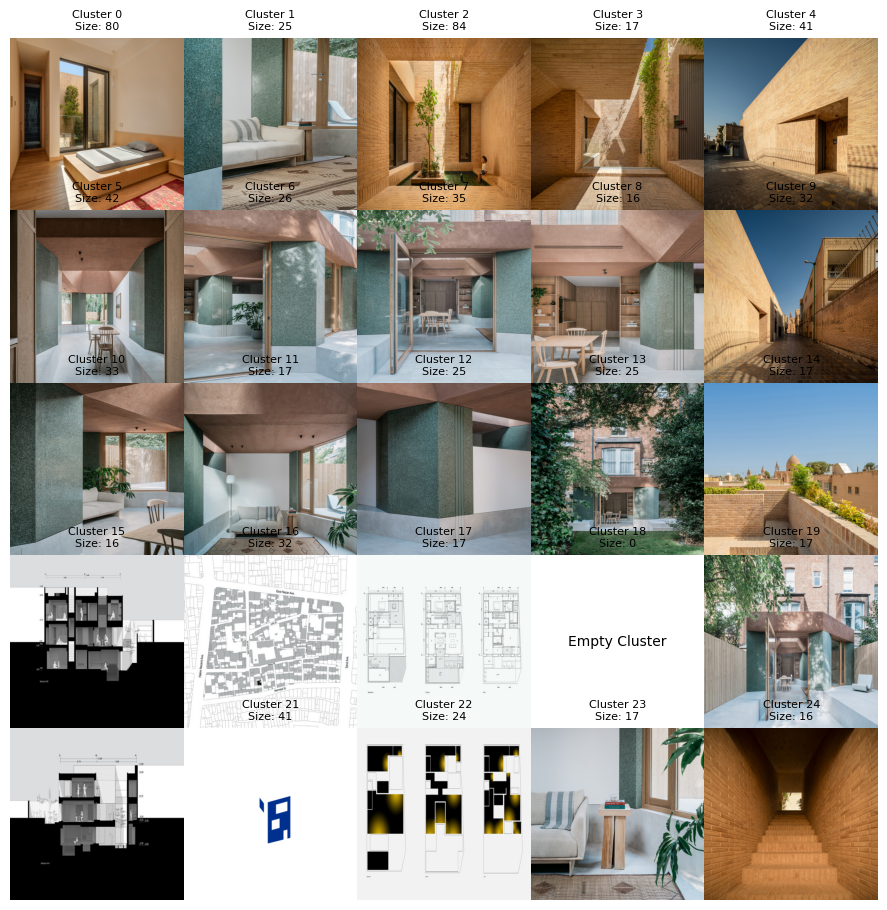

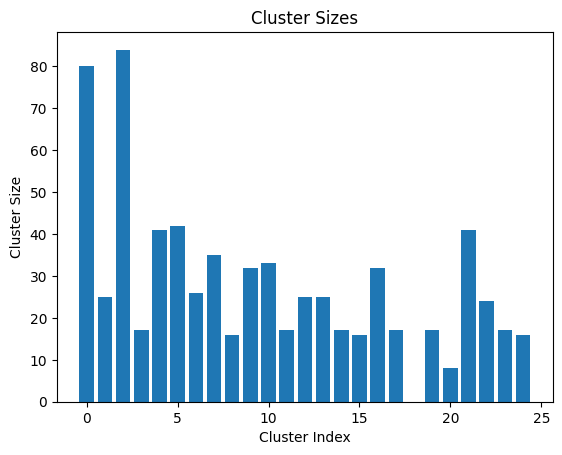

In [ ]:

# Define grid size
dpi = 100
subplot_size = 224
figsize = (m * subplot_size / dpi, m * subplot_size / dpi)

# Create a figure with 10x10 subplots
fig, axes = plt.subplots(m, m, figsize=figsize)

# Create a list to keep track of cluster sizes
cluster_sizes = []

# Plot each image in the 10x10 grid
for i in range(m):
    for j in range(m):
        # Get the index of the current SOM node (BMU)
        index = i * m + j

        # Get the list of image indices corresponding to this BMU (i, j)
        bmu_images_indices = [idx for idx, bmu in enumerate(bmu_indices) if tuple(bmu) == (i, j)]

        # Append cluster size to the list
        cluster_sizes.append(len(bmu_images_indices))

        # Plot the first image in the cluster (you can customize this)
        if len(bmu_images_indices) > 0:
            # Load the first image for this BMU
            img_index = bmu_images_indices[0]  # You can loop through all images if needed
            img = Image.open(image_dir + '/' + filenames[img_index])  # Load the image from filename

            # Display the image without black borders and set aspect ratio to 'auto'
            axes[i, j].imshow(img, aspect='auto')
        else:
            # In case of empty clusters, display a placeholder or a message
            axes[i, j].text(0.5, 0.5, "Empty Cluster", ha="center", va="center")

        # Add a title with the cluster index and size
        axes[i, j].set_title(f'Cluster {index}\nSize: {len(bmu_images_indices)}', fontsize=8)

        # Remove the axis ticks for a cleaner look
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        # Hide borders around the images
        axes[i, j].spines['top'].set_visible(False)
        axes[i, j].spines['right'].set_visible(False)
        axes[i, j].spines['left'].set_visible(False)
        axes[i, j].spines['bottom'].set_visible(False)

# Adjust layout to remove padding between images
plt.subplots_adjust(wspace=0, hspace=0)

# Save the figure to a file
plt.savefig('grid_som_10x10_no_borders.png', bbox_inches='tight', pad_inches=0)

# Visualize cluster sizes as a bar chart
plt.figure()
plt.bar(range(m * m), cluster_sizes)
plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes')
plt.savefig('cluster_sizes.png')

plt.show()


# **Display 25  images belonging to the target cluster.**

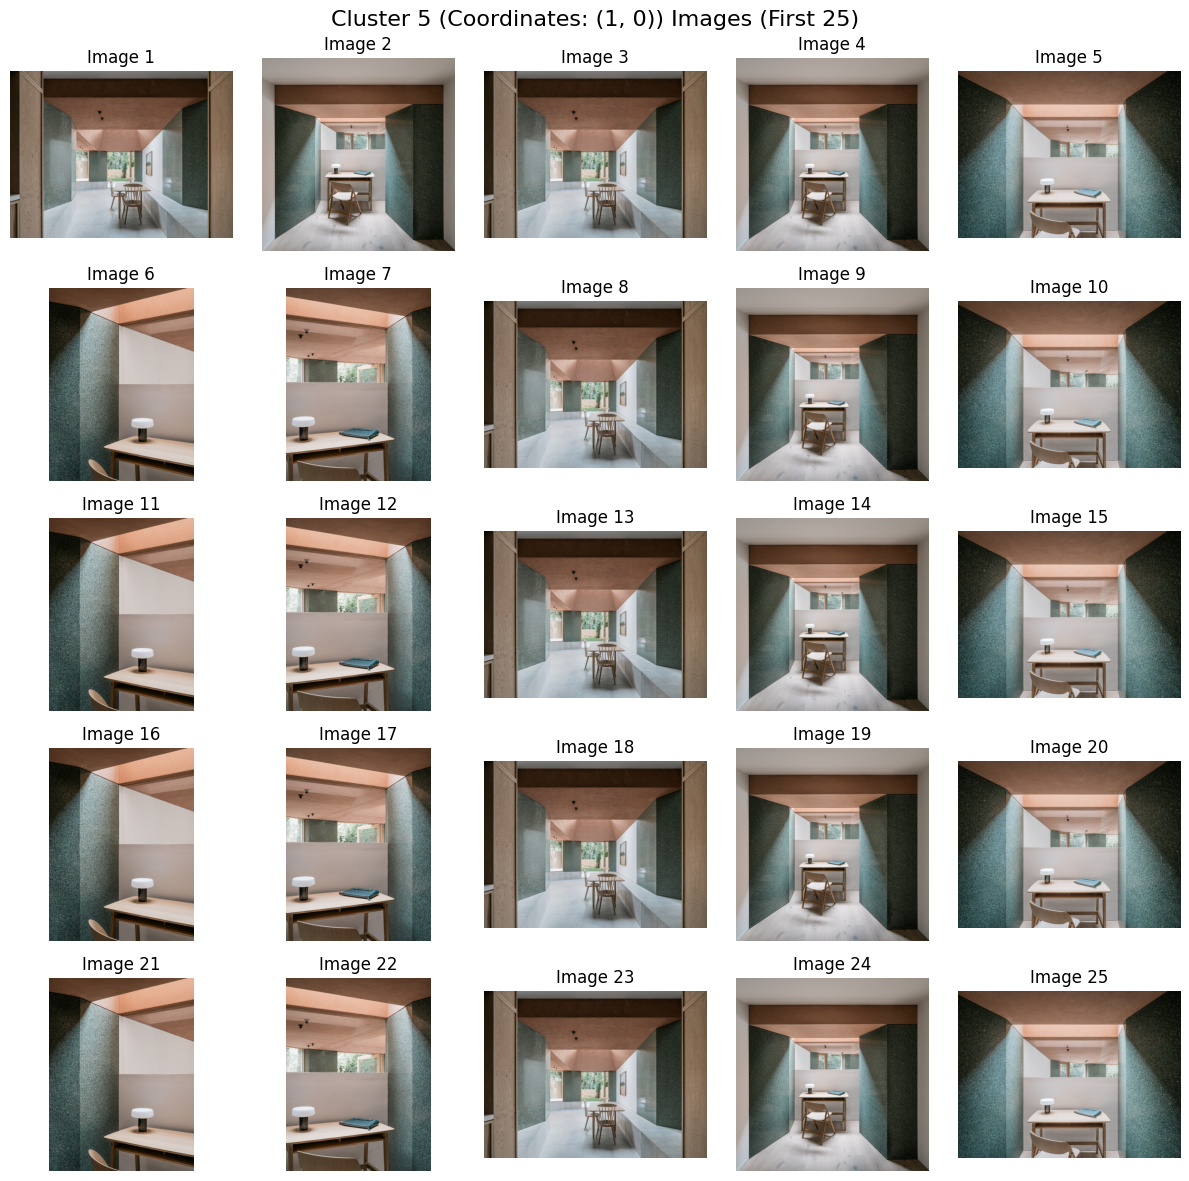

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Set the target cluster number (0 to m*m-1)
target_cluster_number = 5  # Change this to the cluster number you want to display



# Convert the target cluster number to BMU coordinates
target_cluster = (target_cluster_number // m, target_cluster_number % m)  # Convert cluster number to (x, y) coordinates

# Find all image indices belonging to the target cluster
cluster_image_indices = [i for i in range(len(bmu_indices)) if tuple(bmu_indices[i]) == target_cluster]

# Check if there are images in the target cluster
if len(cluster_image_indices) == 0:
    # No images in this cluster, display a message
    plt.figure(figsize=(6, 6))
    plt.text(0.5, 0.5, "There are no images in this cluster", ha="center", va="center", fontsize=16)
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()
else:
    # Limit the display to the first 25 images (you can adjust this number)
    num_images_to_display = min(25, len(cluster_image_indices))
    cluster_image_indices = cluster_image_indices[:num_images_to_display]

    # Create a figure to display the cluster images
    plt.figure(figsize=(12, 12))
    plt.suptitle(f"Cluster {target_cluster_number} (Coordinates: {target_cluster}) Images (First {num_images_to_display})", fontsize=16)

    # Iterate through and display the images in a 5x5 grid
    for i, img_index in enumerate(cluster_image_indices):
        plt.subplot(5, 5, i + 1)  # Create a subplot for each image (5 rows x 5 columns)

        try:
            # Load the image from the filename
            img = Image.open(image_dir + '/' + filenames[img_index])
            plt.imshow(img)
            plt.title(f"Image {i+1}")
            plt.axis('off')  # Hide axes for a cleaner display
        except Exception as e:
            print(f"Error loading image {filenames[img_index]}: {e}")
            plt.text(0.5, 0.5, "Error", ha="center", va="center")
            plt.axis('off')

    plt.tight_layout()
    plt.show()
